<a href="https://colab.research.google.com/github/AbdelrahmanFeteha/Time-Series-Analysis-for-Air-passengers-datasets/blob/main/NN_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time-Series Analysis for Air passengers datasets**




**1. Problem Definition**
- International Airline Passengers prediction problem.
- This is a problem where, given a year and a month, the task is to predictthe number of international airline passengers in units of 1,000.
- The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

**2. Collect Datset**
- Dataset from: https://www.kaggle.com/rakannimer/air-passengers

**3. Preliminary Analysis to understand the dataset**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#plt.style.use('dark_background')

In [51]:
# load the dataset
df = pd.read_csv('AirPassengers.csv')
print(df.dtypes)


Month         object
Passengers     int64
dtype: object


In [52]:
df['Month'] = pd.to_datetime(df['Month']) #This line to change the data type from object "text" to datetime format to be able to plot # of passenger vs time
print(df.dtypes)


Month         datetime64[ns]
Passengers             int64
dtype: object


In [53]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [54]:
#Check if there is any missing values
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Month         0
Passengers    0
dtype: int64


In [55]:
#Let the dataset be indexed by time
df.set_index('Month', inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


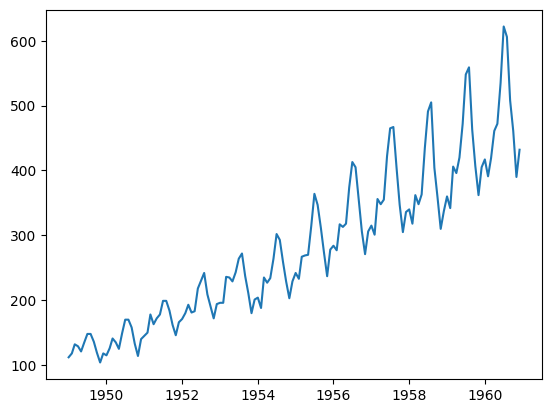

In [56]:
#Plot # of passenger Vs. Time
plt.plot(df['Passengers'])

In [57]:
#Is the data stationary?
#Dickey-Fuller test for Stationarity test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA


pvalue =  0.991880243437641  if above 0.05, data is not stationary


In [58]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df


,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


<Axes: xlabel='year', ylabel='Passengers'>

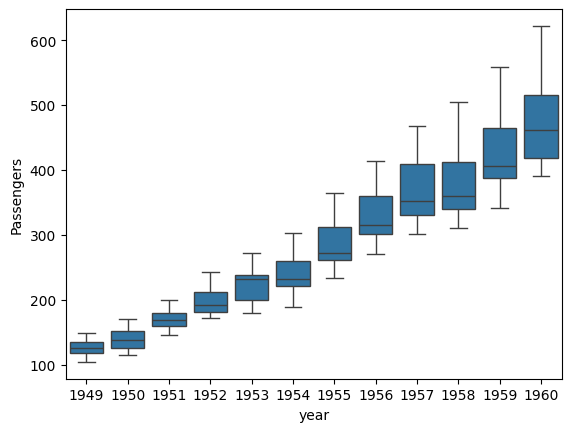

In [59]:
#Plot yearly and monthly values as boxplot
sns.boxplot(x='year', y='Passengers', data=df)


<Axes: xlabel='month', ylabel='Passengers'>

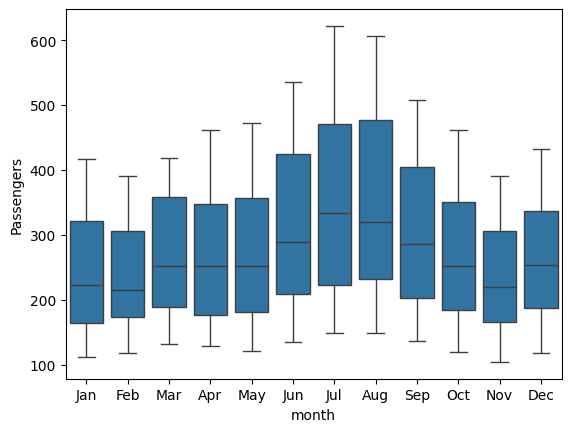

In [60]:
#Plot yearly and monthly values as boxplot
sns.boxplot(x='month', y='Passengers', data=df)


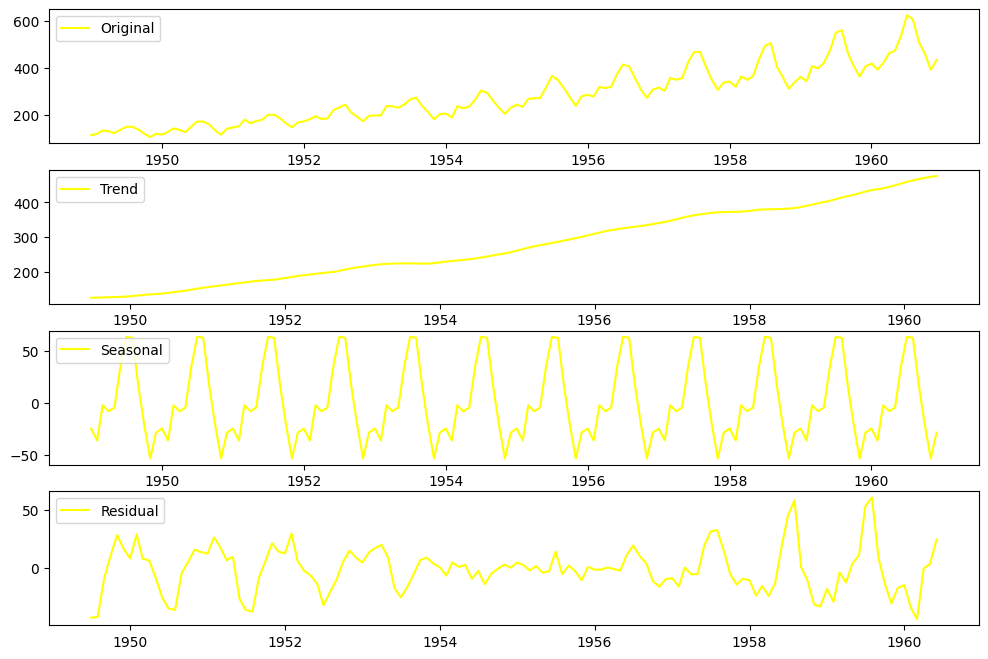

In [61]:
#Extract and plot trend, seasonal and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Passengers'],
                            model ='additive')

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

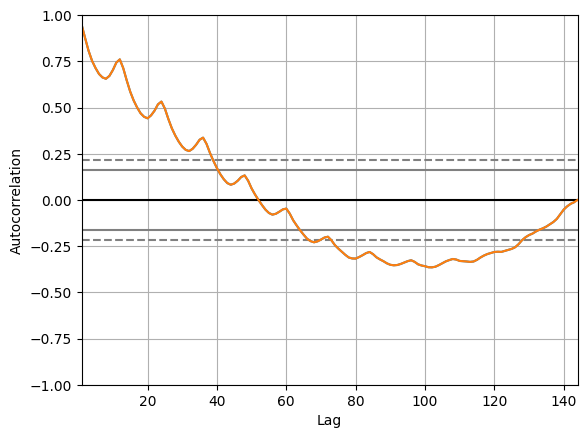

In [62]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

from statsmodels.tsa.stattools import acf

acf_144 = acf(df.Passengers, nlags=144)
plt.plot(acf_144)

#Obtain the same but with single line and more info...
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers)
#Horizontal bands indicate 95% and 99% (dashed) confidence bands

#A strong positive correlation for lags below 40 (months)

#**Time-Seriese Forcasting Using Feed Forward Neural Network (FNN)**

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

#Machine learning Libraries

from keras.models import Sequential

#importing a fully connected layers
from keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



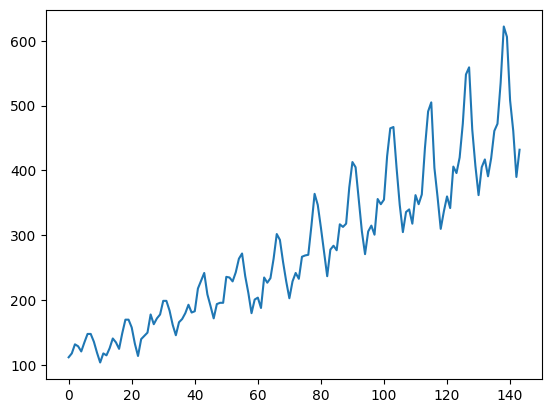

In [64]:
# load the dataset
dataframe = read_csv('AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [65]:
#Convert pandas dataframe to numpy array which is the suitable data type when working with keras
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float
#dataset


In [66]:
dataset.shape

(144, 1)

In [67]:
# Normalization is optional but recommended for neural network as certain
# activation functions are sensitive to magnitude of numbers.
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)
#dataset

In [68]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [69]:
train.shape
#test.shape

(95, 1)

In [70]:
# We cannot fit the model like we normally do for image processing where we have
#X and Y. We need to transform our data into something that looks like X and Y values.
# This way it can be trained on a sequence rather than indvidual datapoints.
# Let us convert into n number of columns for X where we feed sequence of numbers
#then the final column as Y where we provide the next number in the sequence as output.
# So let us convert an array of values into a dataset matrix

#seq_size is the number of previous time steps to use as
#input variables to predict the next time period.

#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...)
#and Y is the number of passengers at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)


seq_size = 10 # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

#Compare trainX and dataset. You can see that X= values at t, t+1 and t+2
#whereas Y is the value that follows, t+3 (since our sequence size is 3)


In [71]:
trainX

array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
        0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
        0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
        0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
        0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104],
       [0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
        0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857],
       [0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
        0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557],
       [0.08494207, 0.06177607, 0.0289575

In [72]:

print('Build deep model...')
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
#model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary())

#for layer in model.layers:
#    print(layer.input_shape)

##################################################
#Try another model....
print('Build simple model...')
# create and fit dense model
model = Sequential()
model.add(Dense(8, input_dim=seq_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary())

Build deep model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Build simple model...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [73]:
#Train the model
#model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)


Epoch 1/100
3/3 - 1s - 362ms/step - acc: 0.0119 - loss: 0.2049 - val_acc: 0.0000e+00 - val_loss: 1.2849
Epoch 2/100
3/3 - 0s - 33ms/step - acc: 0.0119 - loss: 0.1919 - val_acc: 0.0000e+00 - val_loss: 1.2154
Epoch 3/100
3/3 - 0s - 45ms/step - acc: 0.0119 - loss: 0.1781 - val_acc: 0.0000e+00 - val_loss: 1.1436
Epoch 4/100
3/3 - 0s - 70ms/step - acc: 0.0119 - loss: 0.1655 - val_acc: 0.0000e+00 - val_loss: 1.0705
Epoch 5/100
3/3 - 0s - 83ms/step - acc: 0.0119 - loss: 0.1517 - val_acc: 0.0000e+00 - val_loss: 0.9981
Epoch 6/100
3/3 - 0s - 49ms/step - acc: 0.0119 - loss: 0.1391 - val_acc: 0.0000e+00 - val_loss: 0.9268
Epoch 7/100
3/3 - 0s - 55ms/step - acc: 0.0119 - loss: 0.1263 - val_acc: 0.0000e+00 - val_loss: 0.8581
Epoch 8/100
3/3 - 0s - 43ms/step - acc: 0.0119 - loss: 0.1140 - val_acc: 0.0000e+00 - val_loss: 0.7921
Epoch 9/100
3/3 - 0s - 55ms/step - acc: 0.0119 - loss: 0.1029 - val_acc: 0.0000e+00 - val_loss: 0.7280
Epoch 10/100
3/3 - 0s - 64ms/step - acc: 0.0119 - loss: 0.0923 - val_acc

In [74]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Train Score: 31.12 RMSE


In [75]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 83.41 RMSE


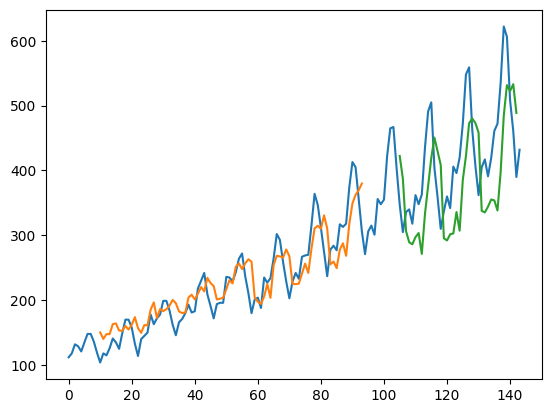

In [76]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset.
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#**Time-Series Forcasting Using Long Short Term Memory (LSTM)**

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [78]:
# load the dataset
dataframe = read_csv('AirPassengers.csv', usecols=[1])

In [79]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

In [80]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [81]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [82]:
#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...)
#and Y is the number of passengers at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)


seq_size = 10  # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [83]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM with 1 hidden dense layer
print('Single LSTM with hidden Dense...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, seq_size)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
##monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20,
##                        verbose=1, mode='auto', restore_best_weights=True)
model.summary()

Single LSTM with hidden Dense...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,313 (83.25 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
#Stacked LSTM with 1 hidden dense layer
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, None, 50)       │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,065 (133.07 KB)

 Trainable params: 34,065 (133.07 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
#Bidirectional LSTM
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
##For some sequence forecasting problems we may need LSTM to learn
## sequence in both forward and backward directions
#from keras.layers import Bidirectional
#model = Sequential()
#model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, seq_size)))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()
#print('Train...')

In [86]:
#ConvLSTM
#The layer expects input as a sequence of two-dimensional images,
#therefore the shape of input data must be: [samples, timesteps, rows, columns, features]

trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
print('Train...')


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 1, 1, 64)       │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,313 (83.25 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 0 (0.00 B)

Train...


In [87]:
#Train the model
print('Train...')
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Train...
Epoch 1/100
3/3 - 3s - 1s/step - loss: 0.0564 - val_loss: 0.2678
Epoch 2/100
3/3 - 0s - 32ms/step - loss: 0.0388 - val_loss: 0.1939
Epoch 3/100
3/3 - 0s - 43ms/step - loss: 0.0243 - val_loss: 0.1309
Epoch 4/100
3/3 - 0s - 32ms/step - loss: 0.0144 - val_loss: 0.0805
Epoch 5/100
3/3 - 0s - 33ms/step - loss: 0.0093 - val_loss: 0.0465
Epoch 6/100
3/3 - 0s - 31ms/step - loss: 0.0088 - val_loss: 0.0296
Epoch 7/100
3/3 - 0s - 32ms/step - loss: 0.0097 - val_loss: 0.0251
Epoch 8/100
3/3 - 0s - 32ms/step - loss: 0.0104 - val_loss: 0.0246
Epoch 9/100
3/3 - 0s - 31ms/step - loss: 0.0096 - val_loss: 0.0263
Epoch 10/100
3/3 - 0s - 33ms/step - loss: 0.0082 - val_loss: 0.0299
Epoch 11/100
3/3 - 0s - 47ms/step - loss: 0.0072 - val_loss: 0.0351
Epoch 12/100
3/3 - 0s - 31ms/step - loss: 0.0066 - val_loss: 0.0385
Epoch 13/100
3/3 - 0s - 45ms/step - loss: 0.0065 - val_loss: 0.0389
Epoch 14/100
3/3 - 0s - 47ms/step - loss: 0.0064 - val_loss: 0.0358
Epoch 15/100
3/3 - 0s - 48ms/step - loss: 0.0060 -

In [88]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [89]:
# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [90]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 16.22 RMSE


In [91]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 41.39 RMSE


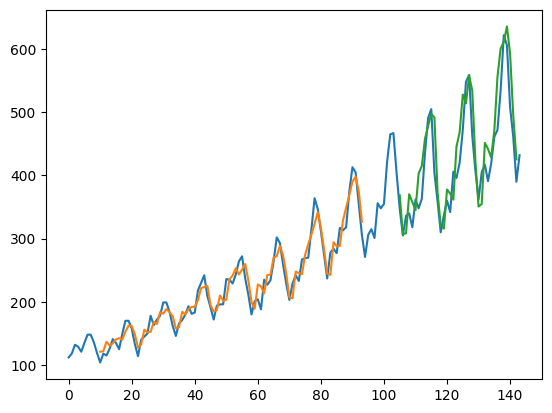

In [92]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset.
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()